<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/machine_learning/lessons/yolo_cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Példa a YOLO modell használatára saját Python kódból

Telepítsük a *ultralytics* modult, hogy a már betanított YOLO modellt használhassuk.

In [1]:
!pip -q install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.2/755.2 kB 14.1 MB/s eta 0:00:00


In [3]:
from matplotlib import pyplot as plt
import cv2
from ultralytics import YOLO

Töltsük be a YOLO modell súlyait.

In [4]:
model = YOLO("yolo-Weights/yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 292MB/s]


Az alábbi objektum fajták detektálására tanították be a modellt.

In [5]:
classNames = model.names
classNames

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

Készítsünk

Töltsünk le egy képet!

In [6]:
!wget -q http://gita.hu/keptar/gita2022/IMG_7802.JPG

Alkalmazzuk a modellt a képre! A megtalált objektumok befoglaló téglalapja és neve mellett a találat vaószínűségét is megkapjuk.


0: 448x640 6 persons, 3 bottles, 12 wine glasss, 4 chairs, 2 dining tables, 136.3ms
Speed: 17.4ms preprocess, 136.3ms inference, 2821.9ms postprocess per image at shape (1, 3, 448, 640)
 665, 402,  983, 777: person 88.5%
  89, 716,  178, 946: wine glass 83.7%
 140, 342,  341, 630: person 80.1%
 204, 356,  574, 758: person 80.1%
   7, 327,  169, 494: person 79.8%
 985, 420, 1316, 962: person 72.0%
 239, 679,  309, 845: wine glass 67.7%
   0, 647, 1323, 986: dining table 67.5%
 326, 321,  422, 487: person 66.4%
1072, 768, 1131, 896: wine glass 65.3%
 304, 666,  386, 833: wine glass 60.9%
 740, 683,  806, 848: wine glass 60.5%
 658, 636,  702, 758: wine glass 55.7%
 632, 315,  754, 583: chair 46.1%
1148, 895, 1197, 996: wine glass 45.0%
 334, 795,  424, 996: bottle 44.4%
 920, 777,  989, 930: wine glass 43.5%
 414, 839,  498, 997: bottle 42.8%
  75, 630,  230, 782: chair 37.6%
1182, 503, 1337, 925: chair 36.1%
1336, 606, 1499, 917: chair 35.6%
   0, 447,  193, 722: dining table 35.2%
101

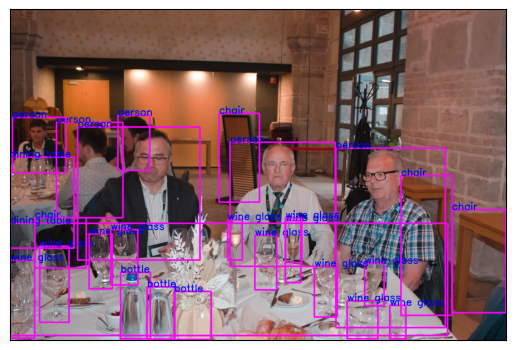

In [7]:
img = cv2.imread('IMG_7802.JPG')
for r in model(img):
    for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy[0]        # bounding box
        print(f"{int(x1):4d}, {int(y1):3d}, {int(x2):4d}, {int(y2):3d}: {classNames[int(box.cls[0])]} {box.conf[0]:.1%}")
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 255), 3)
        cv2.putText(img, classNames[int(box.cls[0])], (int(x1), int(y1)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

A *yol.py* program a GitHub oldalon egy a webkamerából érkező képek feldolgozását valósítja meg, melyet a saját gépén futtathat.